IMPORTAMOS LIBRERIAS


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.express as px

EXPLORAMOS DATOS

In [97]:
# Leer el csv y sacar por pantalla las cinco primeras filas
# Definir la ruta local (al estar en la raíz de "Archivos", solo usamos el nombre)
path_local = "agaricus-lepiota.data"
columns = ["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
           "gill-attachment", "gill-spacing", "gill-size", "gill-color",
           "stalk-shape", "stalk-root", "stalk-surface-above-ring",
           "stalk-surface-below-ring", "stalk-color-above-ring",
           "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
           "ring-type", "spore-print-color", "population", "habitat"]

df = pd.read_csv(url, names=columns)
df.head(5)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


HACEMOS UNA DESCRIPCION DE LOS DATOS QUE TENEMOS EN EL CSV


In [98]:
display(df.describe())

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


GENERAMOS LA INFORMACION DEL CSV Y REVISAMOS EL TIPO QUE SON

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

CALCULAMOS EL NUMERO DE NULOS POR COLUMNAS

In [100]:
df.isnull().sum()


,0
poisonous,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


OBTENEMOS LOS VALORES UNICOS (n_values) POR FEATURE

In [101]:
unique_count = pd.DataFrame({
    'features': df.columns,
    'n_values': [df[col].nunique() for col in df.columns]
})
print(unique_count)

                    features  n_values
0                  poisonous         2
1                  cap-shape         6
2                cap-surface         4
3                  cap-color        10
4                    bruises         2
5                       odor         9
6            gill-attachment         2
7               gill-spacing         2
8                  gill-size         2
9                 gill-color        12
10               stalk-shape         2
11                stalk-root         5
12  stalk-surface-above-ring         4
13  stalk-surface-below-ring         4
14    stalk-color-above-ring         9
15    stalk-color-below-ring         9
16                 veil-type         1
17                veil-color         4
18               ring-number         3
19                 ring-type         5
20         spore-print-color         9
21                population         6
22                   habitat         7


**LIMPIEZA Y TRATAMIENTO**

GENERAMOS GRAFICA PARA VISUALIZAR NULOS MAS CLARAMENTE

<Figure size 1000x500 with 0 Axes>

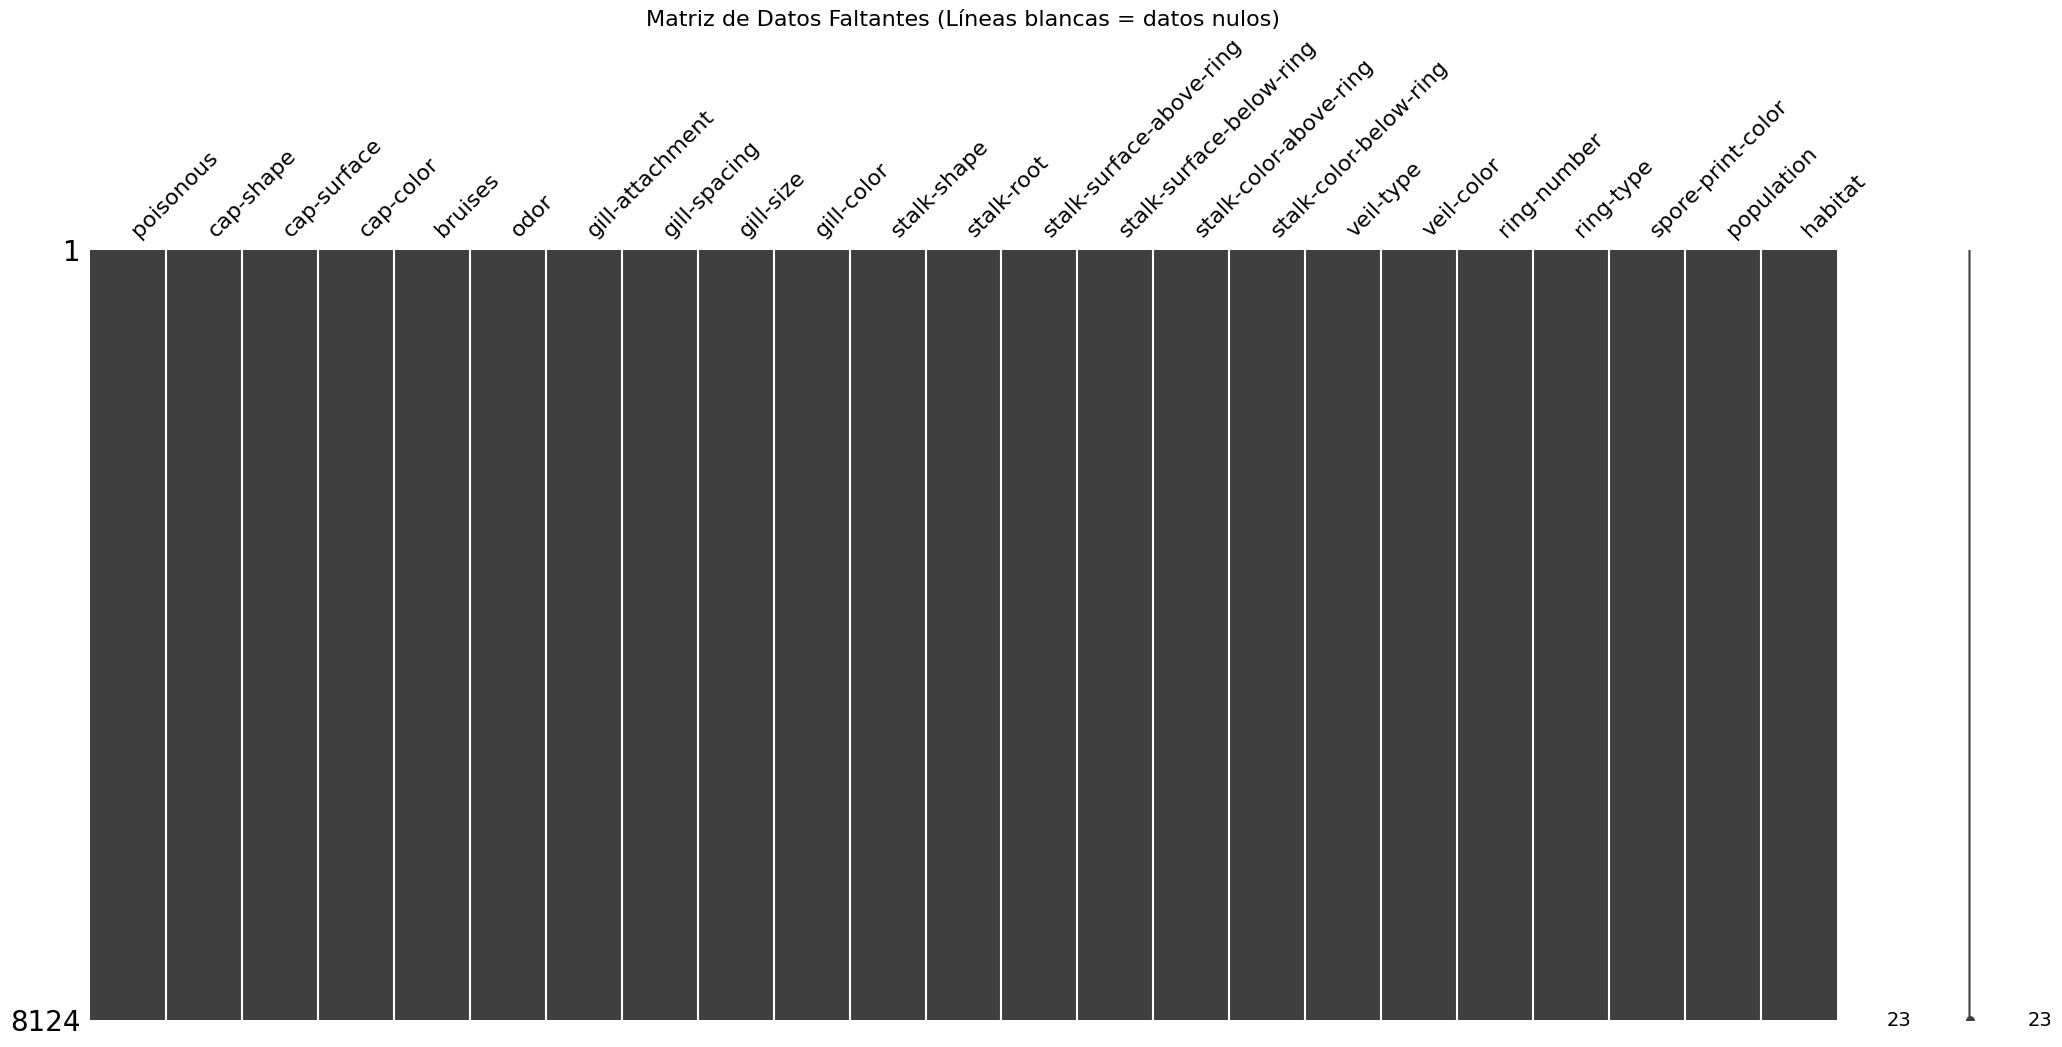

In [102]:
# Esto permite ver si los nulos siguen un patrón o están concentrados en ciertas zonas.
plt.figure(figsize=(10,5))
msno.matrix(df)
plt.title("Matriz de Datos Faltantes (Líneas blancas = datos nulos)", fontsize=16)
plt.show()

MOSTRAMOS LOS PORCENTAJE DATOS DE CADA COLUMNA

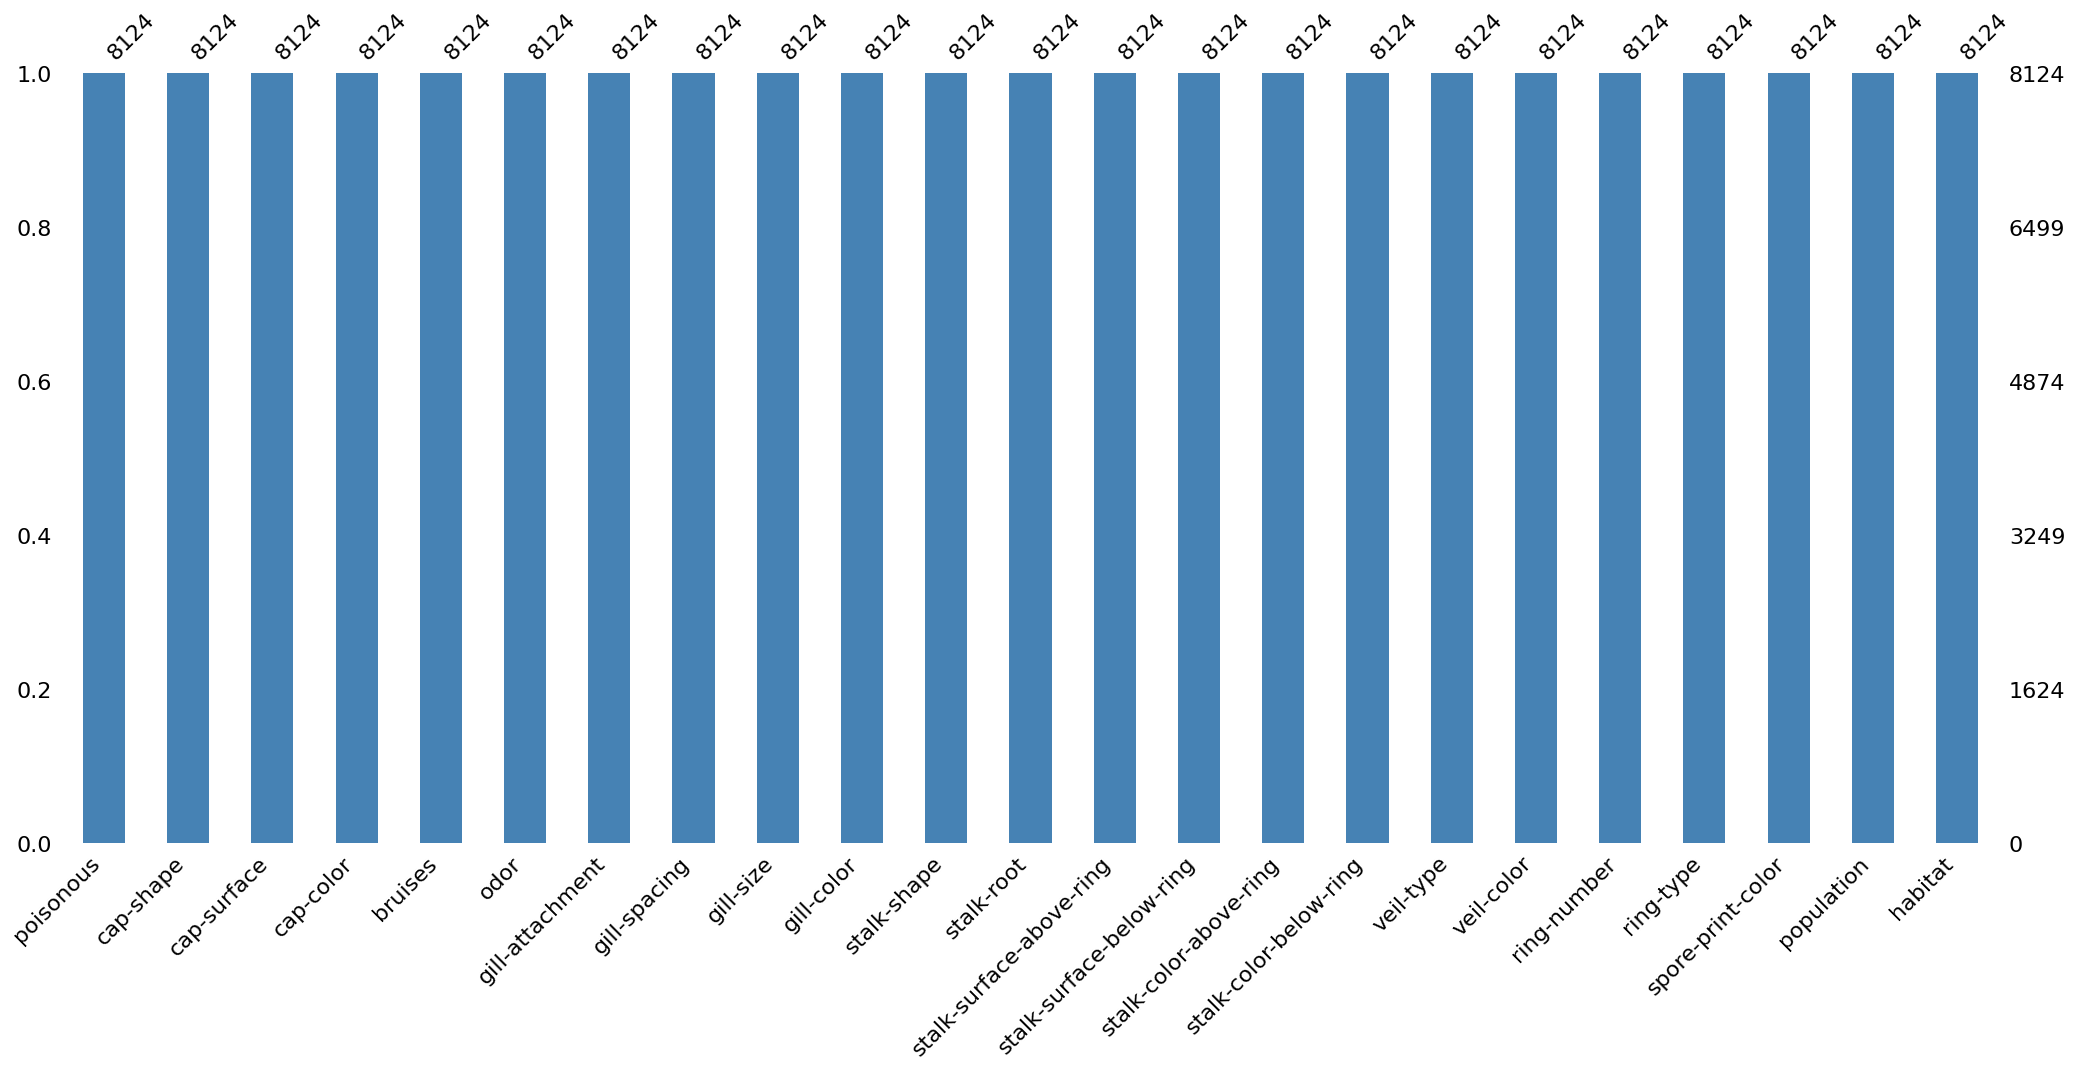

In [103]:

# Muestra el porcentaje de datos presentes en cada columna.
msno.bar(df, color="steelblue")
plt.show()

CREAMOS UNA GRAFICA QUE NOS PERMITA VER LOS DATOS FALTANTES DEL DATASET

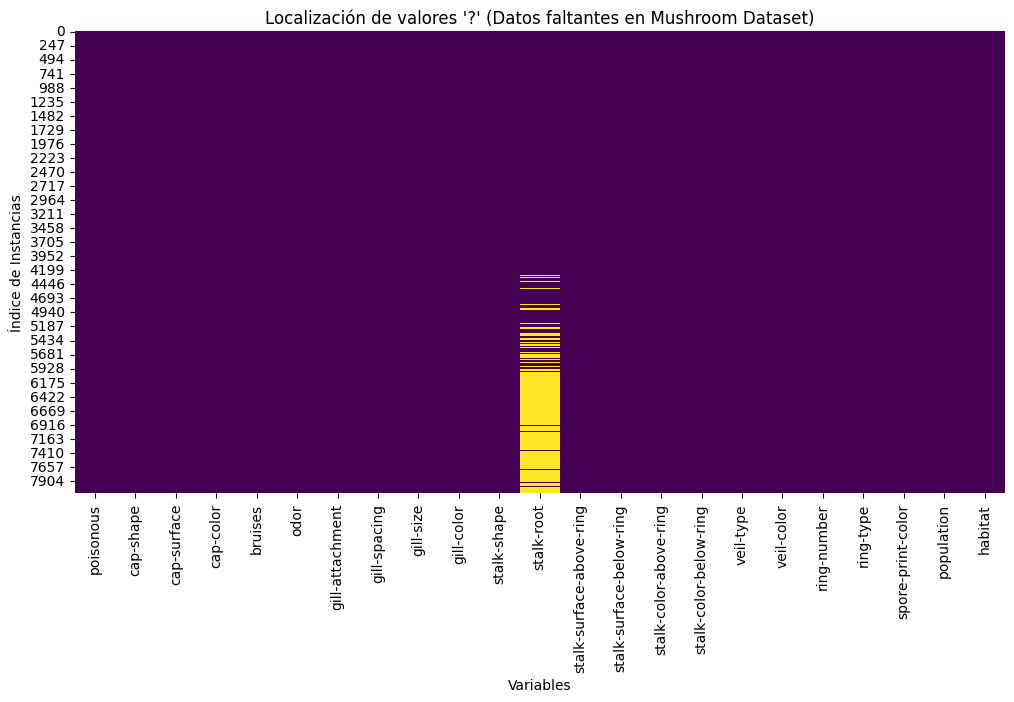

In [104]:
plt.figure(figsize=(12, 6))
sns.heatmap(df == '?', cbar=False, cmap='viridis')
plt.title("Localización de valores '?' (Datos faltantes en Mushroom Dataset)")
plt.xlabel("Variables")
plt.ylabel("Índice de Instancias")
plt.show()

CAMBIAMOS LOS VALORES DESCONOCIDOS A "UNKNOWN" DE LA COLUMNA STALK-ROOT

In [105]:
df['stalk-root'] = df['stalk-root'].replace('?', 'unknown')

ELIMINAMOS COLUMNA QUE SOLO APORTAN UN VALOR UNICO COMO

In [106]:
df.drop(columns=['veil-type'], inplace=True)

**CODIFICACION Y SPLIT**

SE SEPARAN VARIABLES PREDICTORAS

In [107]:
y = df['poisonous']
X = df.drop('poisonous', axis=1)

PCA DE 2 DIMENSIONES

In [108]:
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

REPRESENTAMOS SCATTERPLOT CON ETIQUETA DE ENTRENAMIENTO

In [109]:
# Ajustamos el PCA para obtener 3 dimensiones
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train) # Asumiendo que X_train son tus datos originales


In [110]:
# Crear el gráfico 3D
fig = px.scatter_3d(
    x=X_train_pca_3d[:, 0],
    y=X_train_pca_3d[:, 1],
    z=X_train_pca_3d[:, 2],
    color=y_train,               # Mantiene la distinción entre 'p' y 'e'
    color_discrete_sequence=['#440154', '#22a884'], # Similares a la paleta viridis
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    title="Visualización PCA 3D - Mushroom Dataset"
)

In [111]:
# Ajustar el tamaño de los puntos para que no se amontonen
fig.update_traces(marker=dict(size=3))
fig.show()

In [112]:
# 1. Creamos el modelo de K-Means para 3 clusters
# Usamos los datos del PCA (puedes usar X_train_pca_3d del paso anterior)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train_pca_3d)

In [113]:
# 2. Creamos un DataFrame para facilitar la graficación
df_render = pd.DataFrame(X_train_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_render['cluster'] = clusters.astype(str) # Convertimos a string para colores discretos
df_render['clase_real'] = y_train.values    # Para comparar con el original si quieres

In [114]:
# 3. Graficamos
fig = px.scatter_3d(
    df_render,
    x='PC1', y='PC2', z='PC3',
    color='cluster',
    title="Segmentación en 3 Clusters (K-Means)",
    color_discrete_sequence=px.colors.qualitative.Safe,
    opacity=0.7
    )

# Hacemos los puntos un poco más pequeños para que se vea menos "abultado"
fig.update_traces(marker=dict(size=2))

fig.show()

Clasificador Random Forest y Optimización

In [115]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Precisión inicial RF: {accuracy_score(y_test, y_pred):.4f}")

Precisión inicial RF: 1.0000


REDUCCION DE DIMENSIONALIDAD CON PCA VS PERFORMANCE

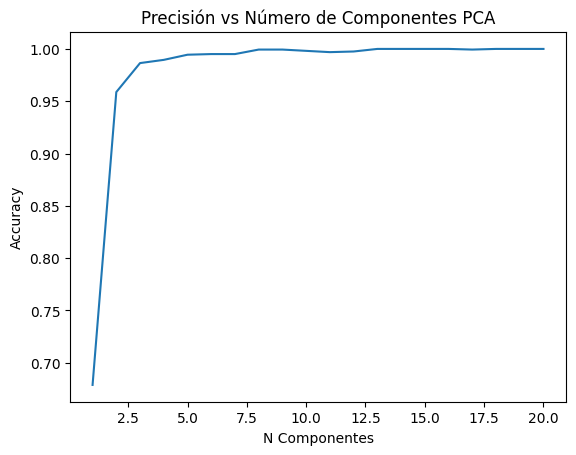

In [116]:
n_features = range(1, 21)
scores = []

for n in n_features:
    # 1. Aplicar PCA
    pca_loop = PCA(n_components=n)
    X_train_reduced = pca_loop.fit_transform(X_train)
    X_test_reduced = pca_loop.transform(X_test)

    # 2. Entrenar RF
    rf_loop = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_loop.fit(X_train_reduced, y_train)

    # 3. Guardar score
    score = rf_loop.score(X_test_reduced, y_test)
    scores.append(score)

sns.lineplot(x=n_features, y=scores)
plt.title("Precisión vs Número de Componentes PCA")
plt.xlabel("N Componentes")
plt.ylabel("Accuracy")
plt.show()

**CLUSTERING (K-MEANS)**

BUSCAMOS VALOR OPTIMO DE K

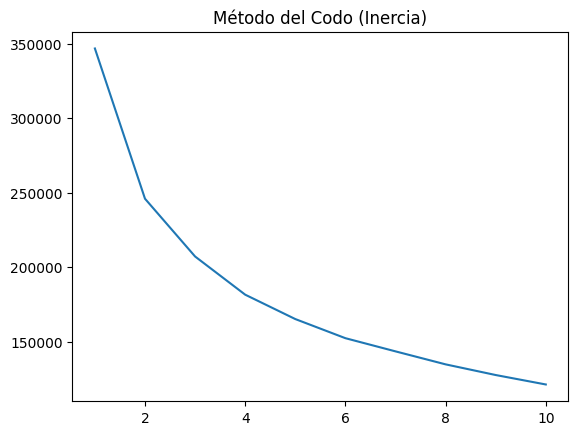

In [117]:
scores_km = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_train)
    scores_km.append(km.inertia_) # inertia_ es la suma de distancias al cuadrado

sns.lineplot(x=k_values, y=scores_km)
plt.title("Método del Codo (Inercia)")
plt.show()

ELEGIMOS K=2 PARA COMPARAR EL DATASET

In [118]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train)

OBSERVAMOS LA DISTRIBUCION REAL DEL CLUSTER

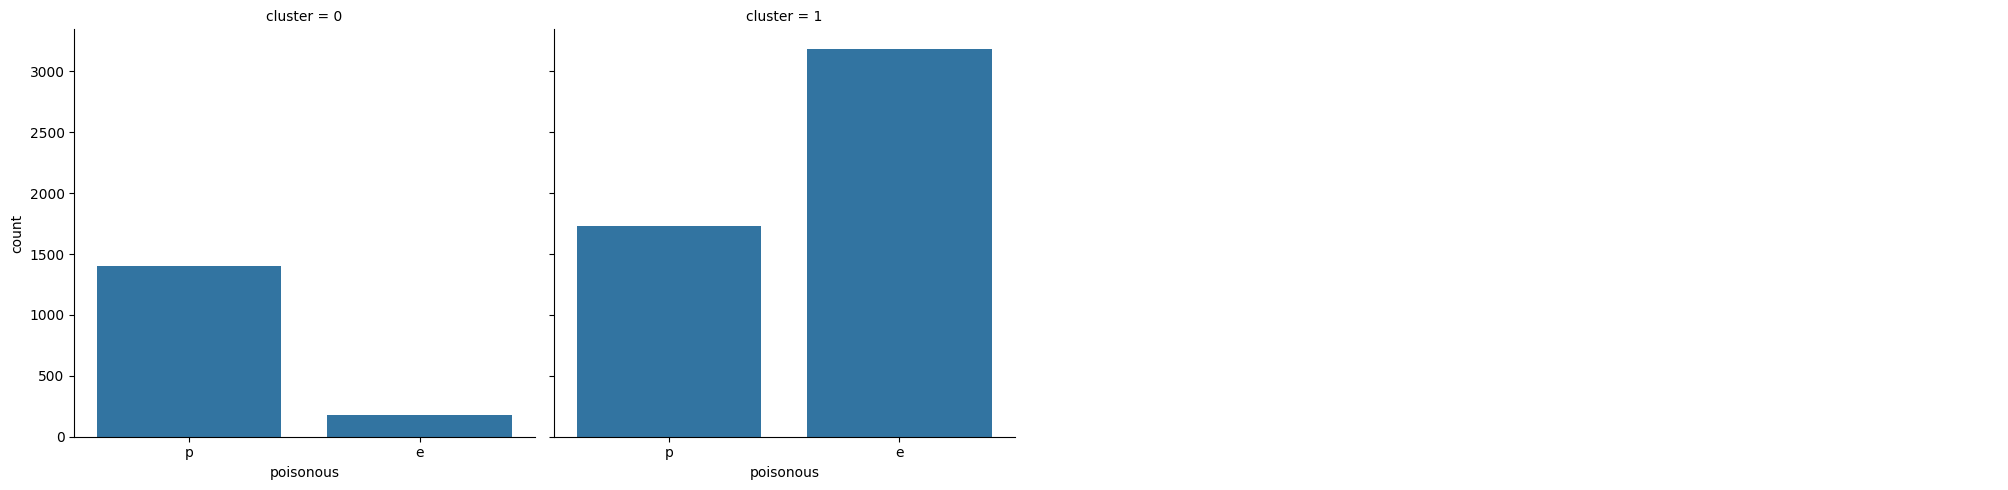

In [119]:
temp_df = pd.DataFrame({'cluster': clusters, 'poisonous': y_train})
sns.catplot(col='cluster', x='poisonous', data=temp_df, kind='count', col_wrap=4)
plt.show()

VISUALIZACION DEL CLUSTER

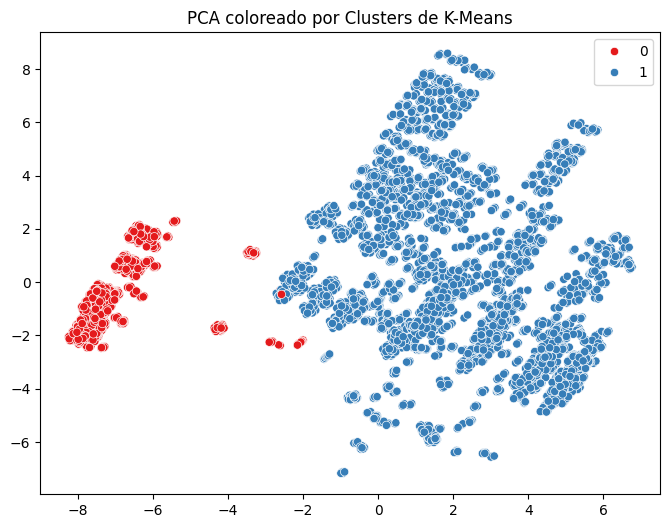

In [120]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=clusters, palette='Set1')
plt.title("PCA coloreado por Clusters de K-Means")
plt.show()

GENERAMOS MATRIZ DE CONFUSION (PARA LOCALIZAR LOS QUE SON VENENOSOS Y NO)

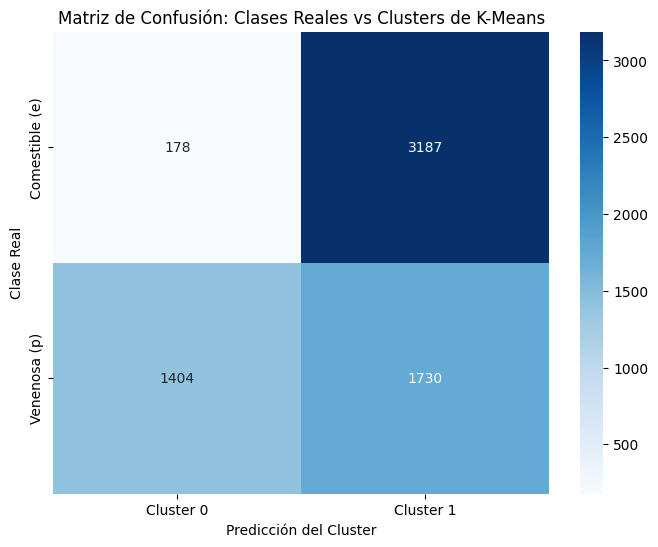

In [121]:
le_y = LabelEncoder()
y_train_encoded = le_y.fit_transform(y_train)
cm = confusion_matrix(y_train_encoded, clusters)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1' ],

            yticklabels=['Comestible (e)', 'Venenosa (p)'])

plt.title('Matriz de Confusión: Clases Reales vs Clusters de K-Means')
plt.xlabel('Predicción del Cluster')
plt.ylabel('Clase Real')
plt.show()

PORCENTAJE DE COINCIDENCIA

### ¿Por qué la tercera fila está en cero?

La matriz de confusión se construye comparando las etiquetas reales (lo que sabes que son) con las etiquetas que predice el modelo o el clustering. En tu caso, `y_train_encoded` solo tiene dos valores (0 y 1) porque `LabelEncoder` mapeó 'e' y 'p' a estos números. No hay una tercera categoría en tus datos originales que signifique "ni comestible, ni venenoso".

Por lo tanto, la fila correspondiente a "ni comestible, ni venenoso" en la matriz de confusión (la tercera fila) es **completamente cero**. Esto significa que **0** hongos de tus datos de entrenamiento fueron clasificados como "ni comestible, ni venenoso" porque, de hecho, esa categoría no existe en los datos reales de la variable `poisonous`.

In [122]:
# Para confirmar, vamos a ver las categorías únicas en tu variable objetivo 'poisonous'
# en el conjunto de entrenamiento (y_train).

print("Valores únicos en la variable objetivo 'poisonous' (y_train):")
print(y_train.value_counts())
print("\nEsto demuestra que solo existen las categorías 'e' (comestible) y 'p' (venenosa).")

Valores únicos en la variable objetivo 'poisonous' (y_train):
poisonous
e    3365
p    3134
Name: count, dtype: int64

Esto demuestra que solo existen las categorías 'e' (comestible) y 'p' (venenosa).


In [123]:
total_coincidencias = np.sum(np.diag(cm))
precision_clustering = total_coincidencias / np.sum(cm)

print(f"Porcentaje de coincidencia del clustering con la realidad: {precision_clustering:.2%}")

Porcentaje de coincidencia del clustering con la realidad: 29.36%


AQUI APRECIAMOS LAS CARACTERISTICAS MAS IMPORTANTES PARA PREDECIR LA TOXICIDAD

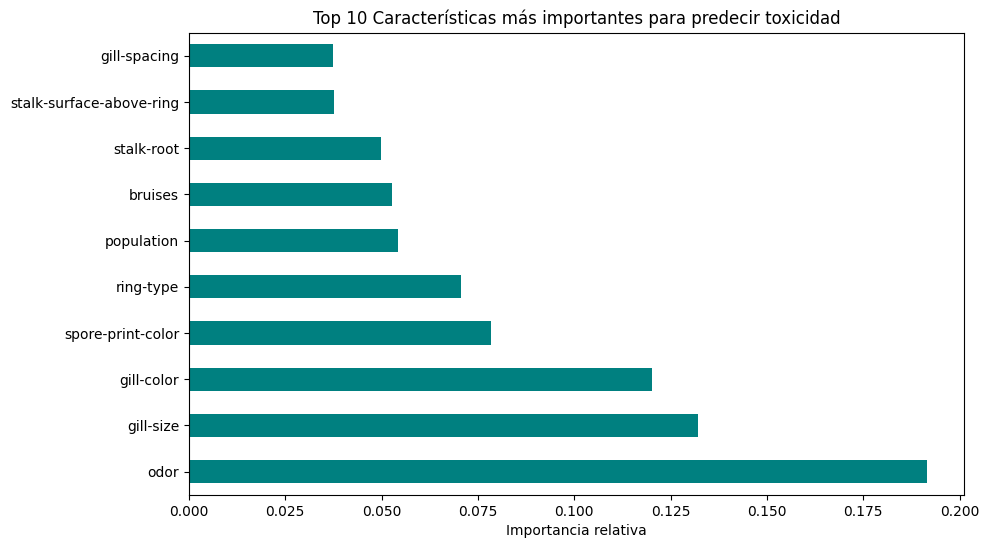

In [124]:
importances = rf.feature_importances_
features = X_train.columns # Changed from X.columns to X_train.columns
feat_importances = pd.Series(importances, index=features).nlargest(10)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal')
plt.title('Top 10 Características más importantes para predecir toxicidad')
plt.xlabel('Importancia relativa')
plt.show()